## Análise exploratória de space titanic

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#essa análise foi feita de acordo com o exame dessa conta: https://medium.com/mlearning-ai/spaceship-titanic-an-alternative-to-the-plain-old-titanic-dataset-aa98924c606c

In [3]:
import zipfile

In [4]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as z:
  print(*z.namelist(),sep='\n')

sample_submission.csv
test.csv
train.csv


In [5]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as t:
  with t.open('train.csv') as principal:
    train = pd.read_csv(principal)

In [6]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as tes:
  with tes.open('test.csv') as teste:
    test = pd.read_csv(teste)

In [7]:
#verificando valores nulos
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
pd.DataFrame(train.isnull().sum(), columns=['valores nulos']).assign(nulos_porcentagem = lambda x: x['valores nulos']/train.shape[0]*100)

,valores nulos,nulos_porcentagem
PassengerId,0,0.000000
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730


In [9]:
transportado = train['Transported'].replace({True: 1, False: 0})
transportado

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [10]:
#para o gráfico abaixo funcionar, é necessário transformar os dados categóricos em numéricos, procedimento feito acima

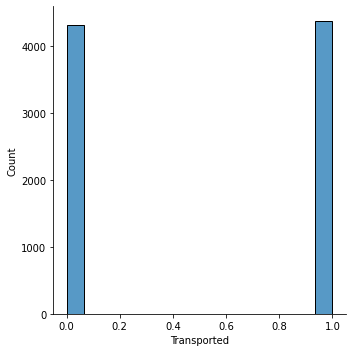

In [11]:
sns.displot(transportado);

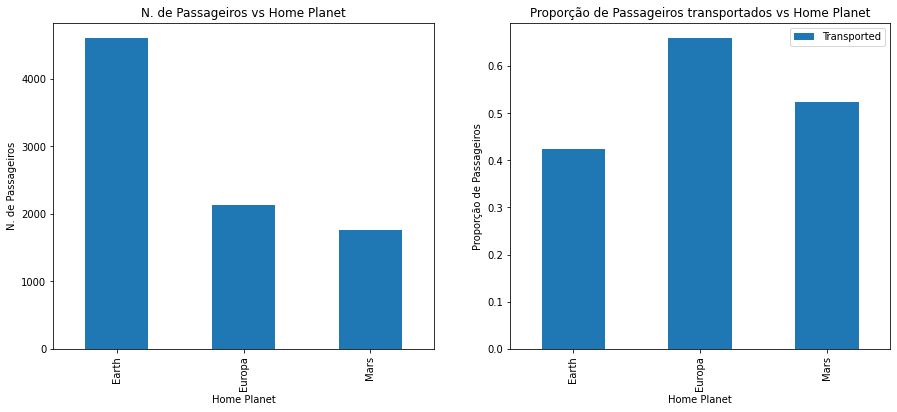

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

ax[0] = train['HomePlanet'].value_counts().plot(kind='bar', ax = ax[0])

ax[0].set_xlabel('Home Planet')
ax[0].set_ylabel('N. de Passageiros')
ax[0].set_title('N. de Passageiros vs Home Planet')

ax[1] = train.groupby('HomePlanet').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])

ax[1].set_xlabel('Home Planet')
ax[1].set_ylabel('Proporção de Passageiros')
ax[1].set_title('Proporção de Passageiros transportados vs Home Planet')
plt.show()

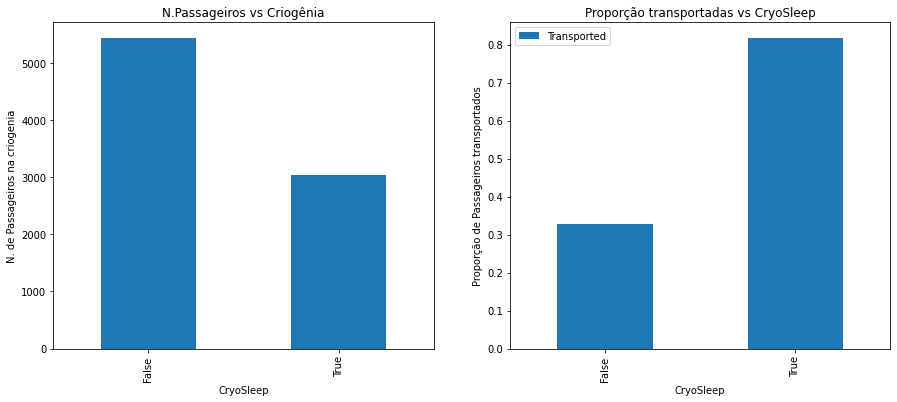

In [13]:
#fazendo a mesma coisa que de cima mas com "Cryo Sleep"
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0] = train['CryoSleep'].value_counts().plot(kind='bar', ax=ax[0])

ax[0].set_xlabel('CryoSleep')
ax[0].set_ylabel('N. de Passageiros na criogenia')
ax[0].set_title('N.Passageiros vs Criogênia')

ax[1] = train.groupby('CryoSleep').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('CryoSleep')
ax[1].set_ylabel('Proporção de Passageiros transportados')
ax[1].set_title('Proporção transportadas vs CryoSleep')
plt.show()

In [14]:
#cryosleep parece ser um bom preditor se um passageiro foi ou não transportado

In [15]:
#cabin indica o lado em que o passageiro ficava, bombordo ou estibordo, a ideia é separar as informações presentes em cabin
train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [16]:
#a divisão será feita via '/'
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand = True).fillna('Missing')

In [17]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [18]:
train['Deck'].unique()

array(['B', 'F', 'A', 'G', 'Missing', 'E', 'D', 'C', 'T'], dtype=object)

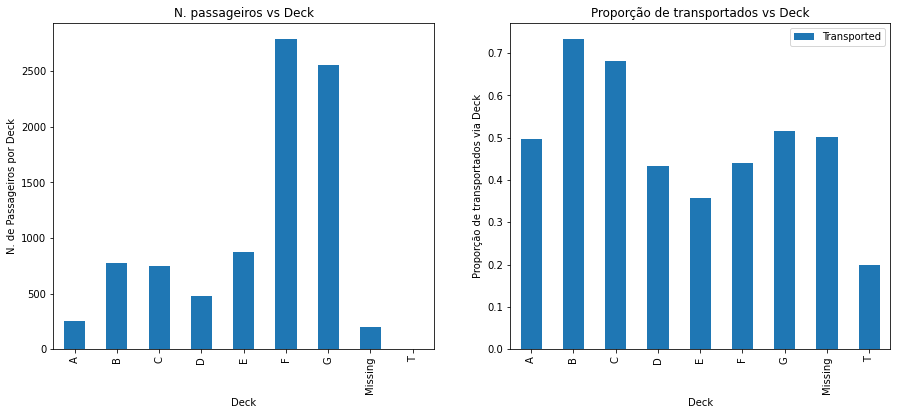

In [19]:
#feita a separacao, agora montar os subplots para cada um, possivelmente deve ter um preditor para "side"
fig, ax = plt.subplots(1,2, figsize=(15,6))

ordem = ['A', 'B', 'C', 'D', 'E', 'F', 'G','Missing', 'T']

separado = train['Deck'].value_counts()
ax[0] = separado.loc[ordem].plot(kind='bar', ax = ax[0])
ax[0].set_xlabel('Deck')
ax[0].set_ylabel('N. de Passageiros por Deck')
ax[0].set_title('N. passageiros vs Deck')


ax[1] = train.groupby('Deck').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Deck')
ax[1].set_ylabel('Proporção de transportados via Deck')
ax[1].set_title('Proporção de transportados vs Deck')

plt.show()

In [20]:
#pelo gráfico acima, a maioria dos passageiros se encontravam nos decks 'f' e 'g'
#porém, proporcionalmente, os decks "b" e "c", tiveram bem mais gente transportada

In [21]:
train['Side'].unique()

array(['P', 'S', 'Missing'], dtype=object)

Text(0.5, 1.0, 'Proporção de Passageiro vs Side')

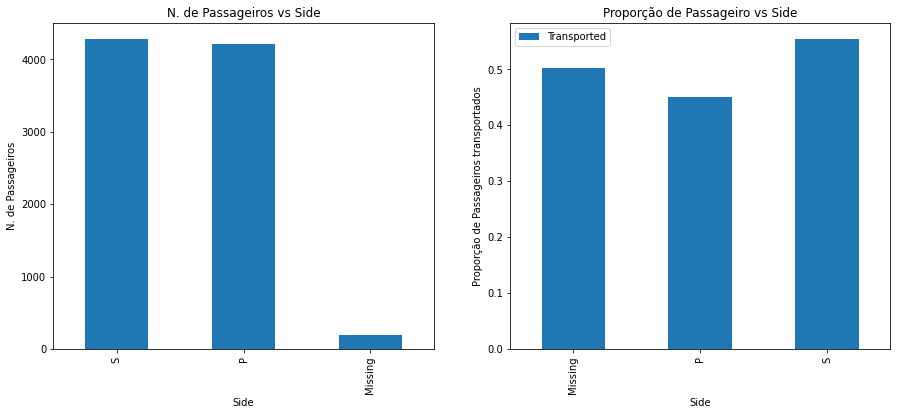

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0] = train['Side'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Side')
ax[0].set_ylabel('N. de Passageiros')
ax[0].set_title('N. de Passageiros vs Side')

ax[1] = train.groupby('Side').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Side')
ax[1].set_ylabel('Proporção de Passageiros transportados')
ax[1].set_title('Proporção de Passageiro vs Side')


In [23]:
#bombordo e estibordo quase iguais
#a quantidade de gente transportada é maior para estibordo

Text(0.5, 1.0, 'Proporção de passageiros transportados vs destination')

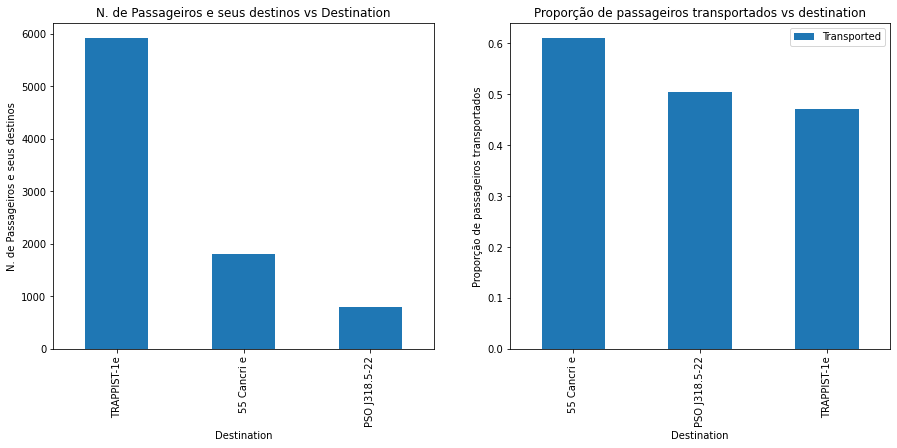

In [24]:
#verificar destination
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0] = train['Destination'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Destination')
ax[0].set_ylabel('N. de Passageiros e seus destinos')
ax[0].set_title('N. de Passageiros e seus destinos vs Destination')


ax[1] = train.groupby('Destination').agg({'Transported': 'mean'}).plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Destination')
ax[1].set_ylabel('Proporção de passageiros transportados')
ax[1].set_title('Proporção de passageiros transportados vs destination')

In [25]:
#passageiros que desembarcariam em 55, mais propensos a serem transportados

In [26]:
#analisar os gastos, onde será feita a soma de 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
colunas_gastos = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train[colunas_gastos] = train[colunas_gastos].fillna(0)
train['Total'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [27]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Total
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0


In [28]:
#gráfico de idade

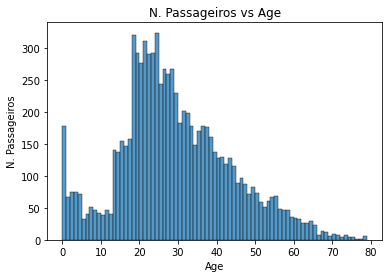

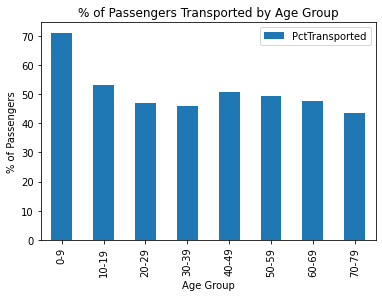

In [29]:
ax = sns.histplot(train, x = 'Age', binwidth=1)
ax.set_ylabel('N. Passageiros')
ax.set_xlabel('Age')
ax.set_title('N. Passageiros vs Age')

agegroup_mapper = {0:'0-9', 1:'10-19', 2:'20-29', 3:'30-39', 4:'40-49', 5:'50-59', 6:'60-69', 7:'70-79', 8:'80-89'}
train['AgeGroup'] = train['Age'].apply(lambda x: np.floor(x/10)).map(agegroup_mapper)
ax = (pd.pivot_table(train, index = 'AgeGroup', columns = 'Transported', values = 'PassengerId', aggfunc = 'count')
      .rename(columns = {True: 'True', False:'False'})
      .assign(PctTransported = lambda x: x['True']/(x['True']+x['False'])*100)
      .reset_index()
      .plot(kind = 'bar', x = 'AgeGroup', y = 'PctTransported'))
ax.set_ylabel('% of Passengers')
ax.set_xlabel('Age Group')
ax.set_title('% of Passengers Transported by Age Group');

In [30]:
#em passagers_id, os primeiros 4 digitos e o grupo e os 2 últimos refere-se a um unico passageiro dentro do grupo

In [31]:
#a ideia é separar esse código
train[['PassengerGroup', 'PassengerNo']] = train['PassengerId'].str.split('_', expand=True)

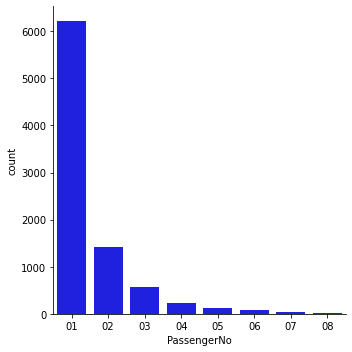

In [32]:
sns.catplot(data = train, x='PassengerNo', kind='count', color='blue');

In [33]:
#Os passageiros do mesmo grupo vêm sempre do mesmo HomePlanet mas nem sempre o mesmo destino

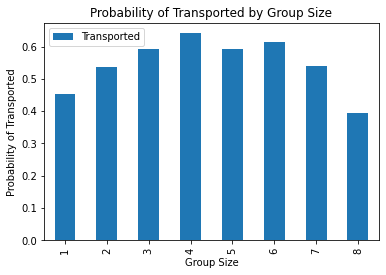

In [34]:
train['GroupSize'] = train.groupby('PassengerGroup')['PassengerId'].transform('nunique')

ax = train.groupby('GroupSize', as_index = False).agg({'Transported': 'mean'}).plot(kind='bar', x = 'GroupSize', y = 'Transported')

ax.set_xlabel('Group Size')
ax.set_ylabel('Probability of Transported')
ax.set_title('Probability of Transported by Group Size');

In [35]:
#Os grupos com tamanho 4 têm a maior probabilidade de serem transportados.

In [36]:
train.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Deck,Num,Side,Total,AgeGroup,PassengerGroup,PassengerNo,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,B,0,P,0.0,30-39,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,F,0,S,736.0,20-29,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,A,0,S,10383.0,50-59,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,A,0,S,5176.0,30-39,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,F,1,S,1091.0,10-19,0004,01,1
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,Sandie Hinetthews,True,F,0,P,774.0,40-49,0005,01,1
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,Billex Jacostaffey,True,F,2,S,1584.0,20-29,0006,01,2
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,Candra Jacostaffey,True,G,0,S,0.0,20-29,0006,02,2
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,Andona Beston,True,F,3,S,1018.0,30-39,0007,01,1
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,Erraiam Flatic,True,B,1,P,0.0,10-19,0008,01,3


In [37]:
y = train['Transported']
X = train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Side', 'Deck', 'AgeGroup', 'GroupSize']]

In [38]:
X

,HomePlanet,CryoSleep,Destination,VIP,Side,Deck,AgeGroup,GroupSize
0,Europa,False,TRAPPIST-1e,False,P,B,30-39,1
1,Earth,False,TRAPPIST-1e,False,S,F,20-29,1
2,Europa,False,TRAPPIST-1e,True,S,A,50-59,2
3,Europa,False,TRAPPIST-1e,False,S,A,30-39,2
4,Earth,False,TRAPPIST-1e,False,S,F,10-19,1
...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,P,A,40-49,1
8689,Earth,True,PSO J318.5-22,False,S,G,10-19,1
8690,Earth,False,TRAPPIST-1e,False,S,G,20-29,1
8691,Europa,False,55 Cancri e,False,S,E,30-39,2


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7)

In [41]:
colunas_numericas = [numeros for numeros in X_train.columns if X_train[numeros].dtype in ['int64', 'float64']]

colunas_categoricas = [categoricas for categoricas in X_train.columns if X_train[categoricas].dtype == 'object' and X_train[categoricas].nunique() < 10]

colunas_totais = colunas_numericas + colunas_categoricas

X_train =  X_train[colunas_totais].copy()
X_valid = X_valid[colunas_totais].copy()


In [42]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6085, 8), (2608, 8), (6085,), (2608,))

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
imputando = SimpleImputer(strategy='median')

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [46]:
dados_categoricos = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('OneHot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    
])

In [47]:
from sklearn.compose import ColumnTransformer

In [48]:
preprocessor = ColumnTransformer(transformers = [
    ('num', imputando, colunas_numericas),
    ('cat', dados_categoricos, colunas_categoricas)
])

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [50]:
modelo = LogisticRegression()

In [51]:
my_pipeline = Pipeline(steps=[
    ('prepro', preprocessor),
    ('model', modelo)
])

In [52]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['GroupSize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP', 'Side',
                                                   'Deck', 'AgeGroup'])])),
         

In [53]:
predicao = my_pipeline.predict(X_valid)
predicao

array([False, False,  True, ...,  True, False, False])

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusao = confusion_matrix(y_valid, predicao)
confusao

array([[1021,  274],
       [ 431,  882]])

In [57]:
#acucaria

In [58]:
from sklearn.metrics import classification_report

In [59]:
report = classification_report(y_valid, predicao)

In [60]:
print(report)

              precision    recall  f1-score   support

       False       0.70      0.79      0.74      1295
        True       0.76      0.67      0.71      1313

    accuracy                           0.73      2608
   macro avg       0.73      0.73      0.73      2608
weighted avg       0.73      0.73      0.73      2608



In [61]:
#recall = índice de acerto

## acrescentando colunas no test

In [62]:
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split('/', expand = True).fillna('Missing')

In [63]:
test[['PassengerGroup', 'PassengerNo']] = test['PassengerId'].str.split('_', expand=True)

In [64]:
test['GroupSize'] = test.groupby('PassengerGroup')['PassengerId'].transform('nunique')

In [65]:
test['AgeGroup'] = test['Age'].apply(lambda x: np.floor(x/10)).map(agegroup_mapper)

In [66]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side,PassengerGroup,PassengerNo,GroupSize,AgeGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,0013,01,1,20-29
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,0018,01,1,10-19
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,0019,01,1,30-39
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,0021,01,1,30-39
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,0023,01,1,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S,9266,02,2,30-39
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,Missing,Missing,Missing,9269,01,1,40-49
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P,9271,01,1,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P,9273,01,1,NaN


In [67]:
colunas_totais

['GroupSize',
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Side',
 'Deck',
 'AgeGroup']

In [68]:
test = test[colunas_totais].copy()

In [69]:
my_pipeline.predict(test)

array([ True, False,  True, ...,  True, False,  True])